In [2]:
import pandas as pd
import yfinance as yf

In [3]:
#Donwload dos dados históriocos
acao = 'PETR4'
inicio = '2022-01-01'
df = yf.download(f'{acao}.SA', start=inicio)

periods = [9,21]

[*********************100%***********************]  1 of 1 completed


# Média Movel Simples

In [4]:
def ma(data, periods: list):
    data = data[['Adj Close']]

    for i in periods:
        data[f'ma_{i}'] = data['Adj Close'].rolling(i).mean()

    return data

In [5]:
df_ma = ma(df, periods)

<ipython-input-4-3ab5d31248dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ma_{i}'] = data['Adj Close'].rolling(i).mean()


# A Média Dinâmica McGinley

In [6]:
df_ma

,Adj Close,ma_9,ma_21
Date,,,
2022-01-03,23.861391,NaN,NaN
2022-01-04,23.951620,NaN,NaN
2022-01-05,23.024723,NaN,NaN
2022-01-06,23.008320,NaN,NaN
2022-01-07,23.114954,NaN,NaN
...,...,...,...
2022-05-20,31.255127,30.458466,28.901044
2022-05-23,32.484512,30.833365,29.142050
2022-05-24,31.600000,30.997315,29.360166


In [7]:
def media_mcginley(df, periods:list):
    for period in periods:
        df[f'McGinley_{period}'] = 0
        for i in range(len(df)):
            if df[f'McGinley_{period}'].iloc[i-1]==0:
                df[f'McGinley_{period}'].iloc[i] = df['Adj Close'].iloc[i]
            else:
                df[f'McGinley_{period}'].iloc[i] = (df[f'McGinley_{period}'].iloc[i-1]
                                                        +(df['Adj Close'].iloc[i] - df[f'McGinley_{period}'].iloc[i-1])
                                                        /(0.6*period*(df['Adj Close'].iloc[i]/df[f'McGinley_{period}'].iloc[i-1])**4))
    return df

In [8]:
media_mcginley(df_ma, periods)

<ipython-input-7-de7d25e46c52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'McGinley_{period}'] = 0
c:\Users\maike\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\Users\maike\anaconda3\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,Adj Close,ma_9,ma_21,McGinley_9,McGinley_21
Date,,,,,
2022-01-03,23.861391,NaN,NaN,23.861391,23.861391
2022-01-04,23.951620,NaN,NaN,23.877850,23.868445
2022-01-05,23.024723,NaN,NaN,23.695114,23.791115
2022-01-06,23.008320,NaN,NaN,23.552051,23.720092
2022-01-07,23.114954,NaN,NaN,23.464809,23.666835
...,...,...,...,...,...
2022-05-20,31.255127,30.458466,28.901044,30.033016,28.776865
2022-05-23,32.484512,30.833365,29.142050,30.364703,28.958081
2022-05-24,31.600000,30.997315,29.360166,30.559735,29.105951


<AxesSubplot:xlabel='Date'>

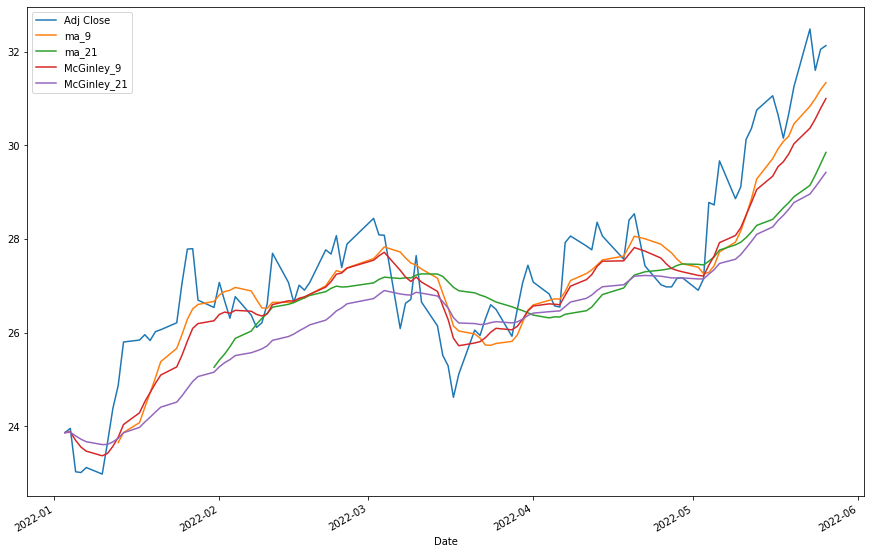

In [9]:
df_ma.plot(figsize=(15,10))